In [60]:
import pandas as pd
import numpy as np
import os
import yfinance as yf
import itertools
import warnings
import functions as func
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import shapiro
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import seaborn as sns

import warnings
from statsmodels.tools.sm_exceptions import ValueWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ValueWarning)


In [2]:
DATA_PATH = "nvda_data.json"

if os.path.exists(DATA_PATH):
    
    with open(DATA_PATH) as f:
        nvda_hist = pd.read_json(DATA_PATH)
else:
    nvda = yf.Ticker("NVDA")
    nvda_hist = nvda.history(period="max")

    nvda_hist.to_json(DATA_PATH)

In [3]:
nvda_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
1999-01-22 05:00:00,0.401320,0.447901,0.355933,0.376237,271468800,0.0,0.0
1999-01-25 05:00:00,0.406097,0.420430,0.376237,0.415653,51048000,0.0,0.0
1999-01-26 05:00:00,0.420430,0.428791,0.377431,0.383404,34320000,0.0,0.0
1999-01-27 05:00:00,0.384598,0.394154,0.363098,0.382210,24436800,0.0,0.0
1999-01-28 05:00:00,0.382210,0.384598,0.378626,0.381015,22752000,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-03 04:00:00,884.840027,903.739990,884.000000,889.640015,37006700,0.0,0.0
2024-04-04 04:00:00,904.059998,906.340027,858.799988,859.049988,43496500,0.0,0.0
2024-04-05 04:00:00,868.659973,884.809998,859.260010,880.080017,39885700,0.0,0.0
2024-04-08 04:00:00,887.000000,888.299988,867.320007,871.330017,28322000,0.0,0.0


<Axes: >

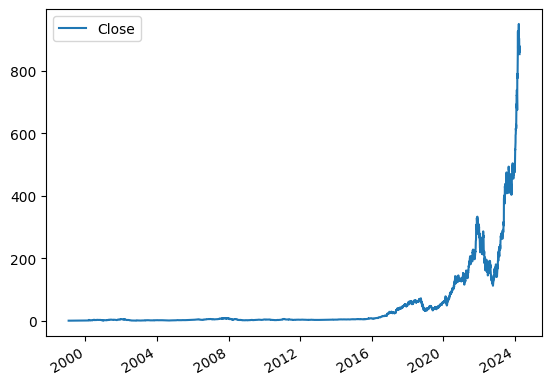

In [4]:
nvda_hist.plot.line(y="Close", use_index=True)

In [6]:
df_nvda = func.calculate_technical_indicators(nvda_hist)

In [7]:
df_nvda

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ema_12,ema_26,macd_line,macd_signal,rsi
1999-01-22 05:00:00,0.401320,0.447901,0.355933,0.376237,271468800,0.0,0.0,0.376237,0.376237,0.000000,0.000000,NaN
1999-01-25 05:00:00,0.406097,0.420430,0.376237,0.415653,51048000,0.0,0.0,0.382301,0.379157,0.003144,0.000629,NaN
1999-01-26 05:00:00,0.420430,0.428791,0.377431,0.383404,34320000,0.0,0.0,0.382471,0.379471,0.002999,0.001103,NaN
1999-01-27 05:00:00,0.384598,0.394154,0.363098,0.382210,24436800,0.0,0.0,0.382430,0.379674,0.002756,0.001434,NaN
1999-01-28 05:00:00,0.382210,0.384598,0.378626,0.381015,22752000,0.0,0.0,0.382213,0.379774,0.002439,0.001635,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-03 04:00:00,884.840027,903.739990,884.000000,889.640015,37006700,0.0,0.0,900.472060,867.487024,32.985035,43.675697,44.162626
2024-04-04 04:00:00,904.059998,906.340027,858.799988,859.049988,43496500,0.0,0.0,894.099433,866.862058,27.237375,40.388032,43.856582
2024-04-05 04:00:00,868.659973,884.809998,859.260010,880.080017,39885700,0.0,0.0,891.942600,867.841166,24.101433,37.130712,50.459906
2024-04-08 04:00:00,887.000000,888.299988,867.320007,871.330017,28322000,0.0,0.0,888.771433,868.099600,20.671833,33.838937,46.493006


In [8]:
df_nvda_clean = df_nvda.dropna(subset=['rsi'])
df_nvda_clean.index = pd.to_datetime(df_nvda_clean.index)
df_nvda_clean

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ema_12,ema_26,macd_line,macd_signal,rsi
1999-02-10 05:00:00,0.351155,0.360710,0.341600,0.347571,14822400,0.0,0.0,0.363664,0.369379,-0.005715,-0.003187,42.682905
1999-02-11 05:00:00,0.348766,0.391764,0.348766,0.377431,13224000,0.0,0.0,0.365782,0.369976,-0.004194,-0.003388,50.264534
1999-02-12 05:00:00,0.382210,0.401320,0.382210,0.398931,10972800,0.0,0.0,0.370882,0.372121,-0.001239,-0.002958,45.977053
1999-02-16 05:00:00,0.406097,0.422819,0.360710,0.401320,21100800,0.0,0.0,0.375565,0.374284,0.001281,-0.002110,55.033490
1999-02-17 05:00:00,0.391764,0.396543,0.372654,0.379821,6772800,0.0,0.0,0.376220,0.374694,0.001526,-0.001383,49.397650
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-03 04:00:00,884.840027,903.739990,884.000000,889.640015,37006700,0.0,0.0,900.472060,867.487024,32.985035,43.675697,44.162626
2024-04-04 04:00:00,904.059998,906.340027,858.799988,859.049988,43496500,0.0,0.0,894.099433,866.862058,27.237375,40.388032,43.856582
2024-04-05 04:00:00,868.659973,884.809998,859.260010,880.080017,39885700,0.0,0.0,891.942600,867.841166,24.101433,37.130712,50.459906
2024-04-08 04:00:00,887.000000,888.299988,867.320007,871.330017,28322000,0.0,0.0,888.771433,868.099600,20.671833,33.838937,46.493006


In [9]:
def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

stat_test = check_stationarity(df_nvda_clean['Close'])

The series is NOT stationary


In [10]:
c = df_nvda_clean.drop(columns=['Dividends', 'Stock Splits'])

## Using differences and log transformation to make data stationary

In [11]:
df_close = df_nvda_clean[['Close']].copy()
df_close.index = pd.to_datetime(df_close.index)
start_date = pd.Timestamp('2020-01-22 05:00:00')
df_close = df_close[df_close.index >= start_date]


df_nvda_log = np.log(df_close)
df_nvda_log = df_nvda_log.drop(df_nvda_log.index[0])

df_diff = df_close.diff()
df_nvda_log_diff = df_nvda_log.diff()
df_nvda_log_diff = df_nvda_log_diff.drop(df_nvda_log_diff.index[0])
df_nvda_log.head()

,Close
2020-01-23 05:00:00,4.142595
2020-01-24 05:00:00,4.133138
2020-01-27 05:00:00,4.091231
2020-01-28 05:00:00,4.123066
2020-01-29 05:00:00,4.113218


<Axes: >

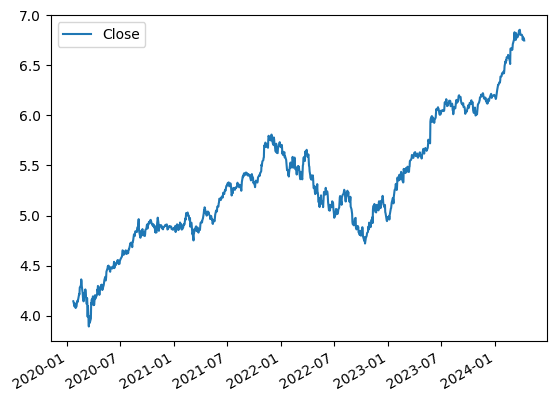

In [12]:
df_nvda_log.plot()

<Axes: >

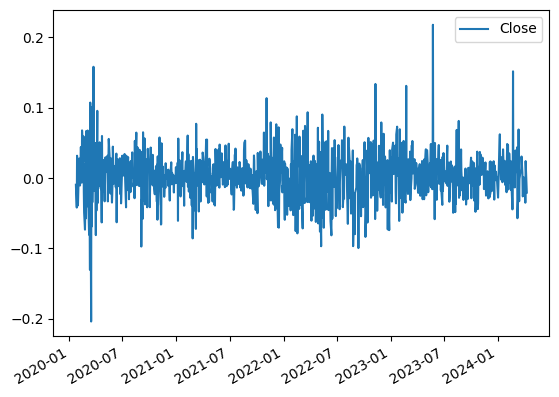

In [13]:
df_nvda_log_diff.plot()

<Axes: >

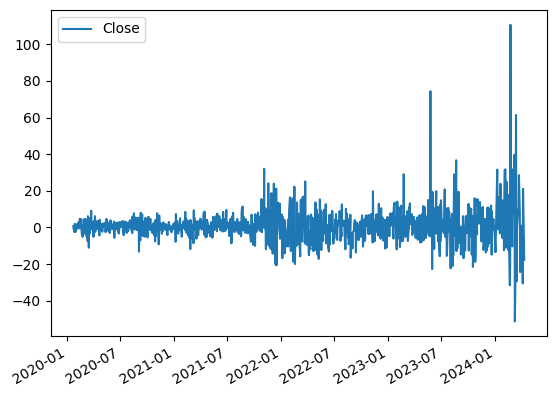

In [14]:
df_diff.plot()

In [15]:
nan_count = df_nvda_log_diff.isna().sum().sum()
inf_count = np.isinf(df_nvda_log_diff).sum().sum()

print("Number of NaN values in the DataFrame:", nan_count)
print("Number of infinite values in the DataFrame:", inf_count)

df_diff = df_diff.drop(df_diff.index[0])
nan_count = df_diff.isna().sum().sum()
inf_count = np.isinf(df_diff).sum().sum()

print("Number of NaN values in the DataFrame:", nan_count)
print("Number of infinite values in the DataFrame:", inf_count)

Number of NaN values in the DataFrame: 0
Number of infinite values in the DataFrame: 0
Number of NaN values in the DataFrame: 0
Number of infinite values in the DataFrame: 0


In [16]:
def perform_adf_test(ts):
    adf_result = adfuller(ts)
    return adf_result

adf_result = perform_adf_test(df_nvda_log_diff)
print("ADF test statistics:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical values:", adf_result[4])

ADF test statistics: -9.8726105264242
p-value: 3.958090591512986e-17
Critical values: {'1%': -3.4365931987759417, '5%': -2.864296541617536, '10%': -2.568237690702948}


In [17]:
def perform_adf_test(ts):
    adf_result = adfuller(ts)
    return adf_result

adf_result = perform_adf_test(df_diff)
print("ADF test statistics:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical values:", adf_result[4])

ADF test statistics: -5.244580509188103
p-value: 7.124891951490105e-06
Critical values: {'1%': -3.436659460539809, '5%': -2.864325767240336, '10%': -2.5682532565554537}


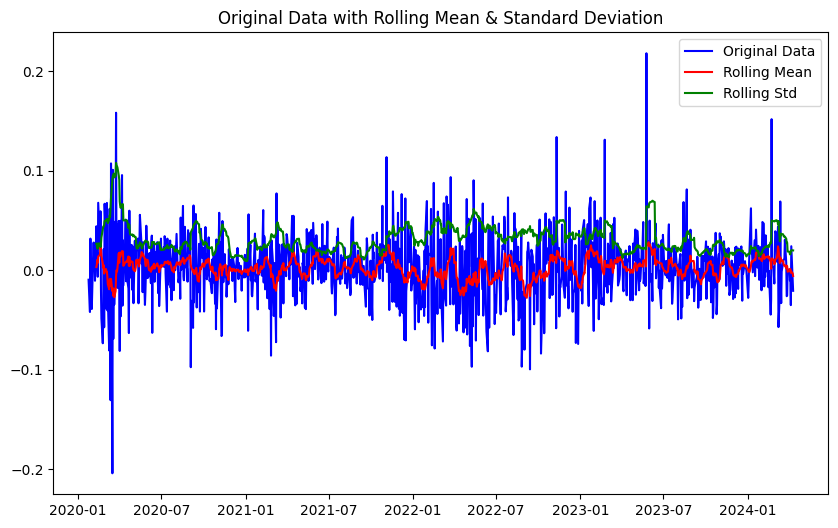

In [24]:
ts = df_nvda_log_diff

plt.figure(figsize=(10, 6))
plt.plot(ts, color='blue', label='Original Data')

rolling_mean = ts.rolling(window=12).mean()
rolling_std = ts.rolling(window=12).std()

plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='green', label='Rolling Std')
plt.title('Original Data with Rolling Mean & Standard Deviation')
plt.legend()
plt.show()

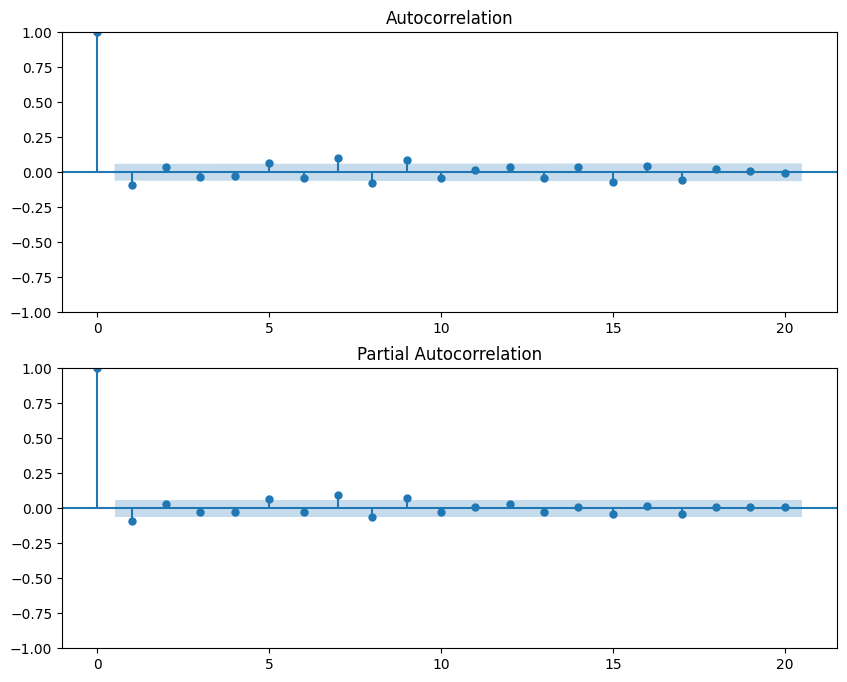

In [25]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(ts, ax=axes[0], lags=20)
plot_pacf(ts, ax=axes[1], lags=20)
plt.show()

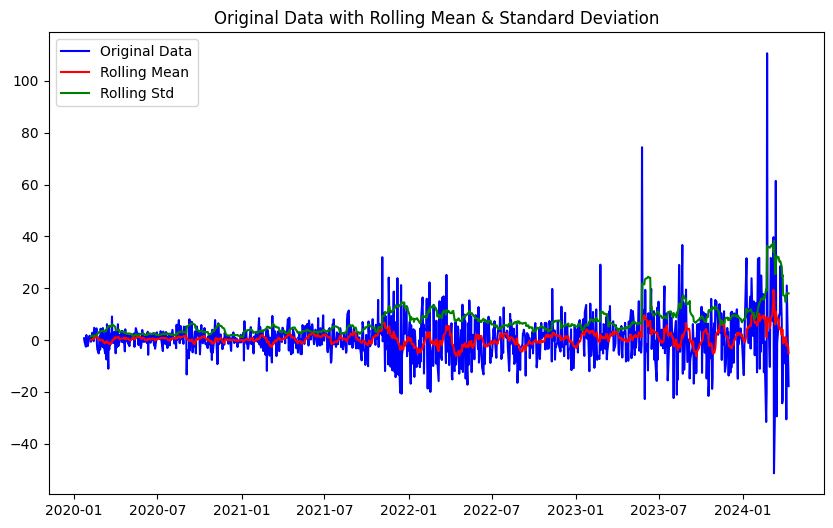

In [26]:
ts = df_diff

plt.figure(figsize=(10, 6))
plt.plot(ts, color='blue', label='Original Data')

rolling_mean = ts.rolling(window=12).mean()
rolling_std = ts.rolling(window=12).std()

plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='green', label='Rolling Std')
plt.title('Original Data with Rolling Mean & Standard Deviation')
plt.legend()
plt.show()

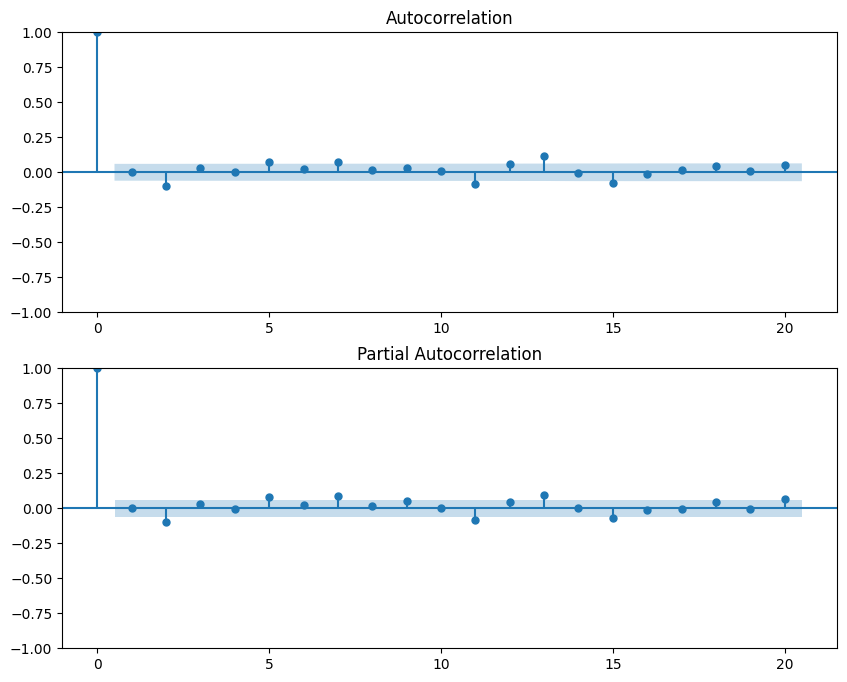

In [27]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(ts, ax=axes[0], lags=20)
plot_pacf(ts, ax=axes[1], lags=20)
plt.show()

In [23]:
df_nvda_clean.index = pd.to_datetime(df_nvda_clean.index)
start_date = pd.Timestamp('2020-01-22 05:00:00')
df_nvda_clean_2020 = df_nvda_clean[df_nvda_clean.index >= start_date]

# Sarima 12

In [28]:
s = 12
model_sarima_12 = auto_arima(df_close, seasonal=True, m=s, max_order=None)

In [29]:
model_sarima_12

ARIMA(order=(4, 2, 2), scoring_args={}, seasonal_order=(0, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

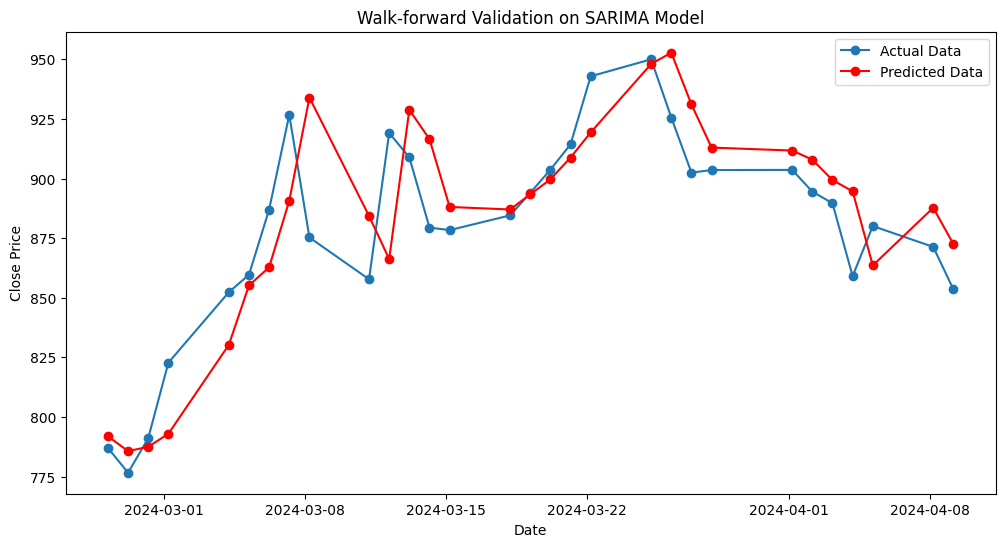

MSE: 566.2301486109741


In [61]:
df_nvda_clean_2020.index = pd.to_datetime(df_nvda_clean_2020.index)
df_nvda_clean_2020 = df_nvda_clean_2020.sort_index()

n_test = 30
train_data = df_nvda_clean_2020['Close'].iloc[:-n_test]
test_data = df_nvda_clean_2020['Close'].iloc[-n_test:]
dates = df_nvda_clean_2020.index[-n_test:] 

history = train_data.copy()
predictions = []
for t in range(n_test):
    model = SARIMAX(history, order=(4, 2, 2), seasonal_order=(0, 0, 1, 12))
    model_fit = model.fit(disp=False)
    output = model_fit.forecast()
    yhat = output.iloc[0] 
    predictions.append(yhat)
    obs = test_data.iloc[t]
    new_index = [dates[t]]
    history = pd.concat([history, pd.Series([obs], index=new_index)])

plt.figure(figsize=(12, 6))
plt.plot(dates, test_data, label='Actual Data', marker='o')
plt.plot(dates, predictions, color='red', label='Predicted Data', marker='o')
plt.legend()
plt.title("Walk-forward Validation on SARIMA Model")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

mse = mean_squared_error(test_data, predictions)
print('MSE:', mse)

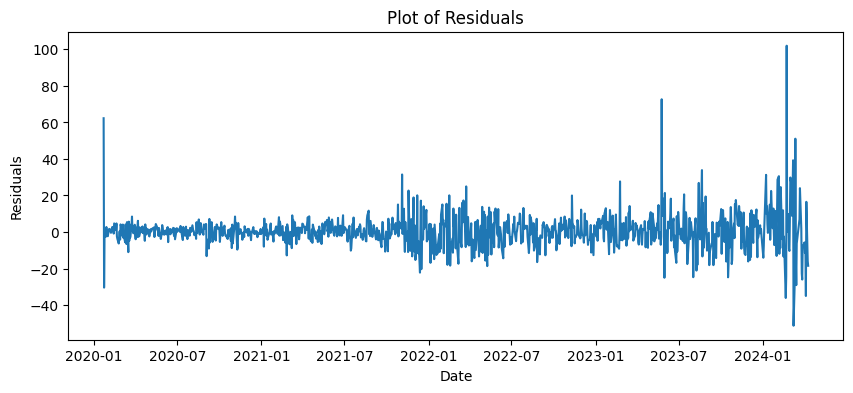

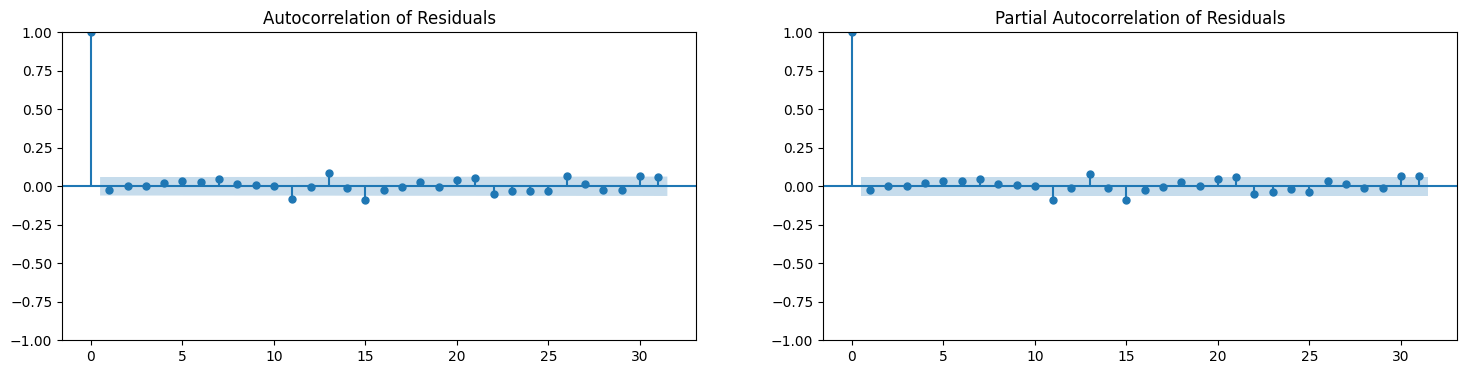

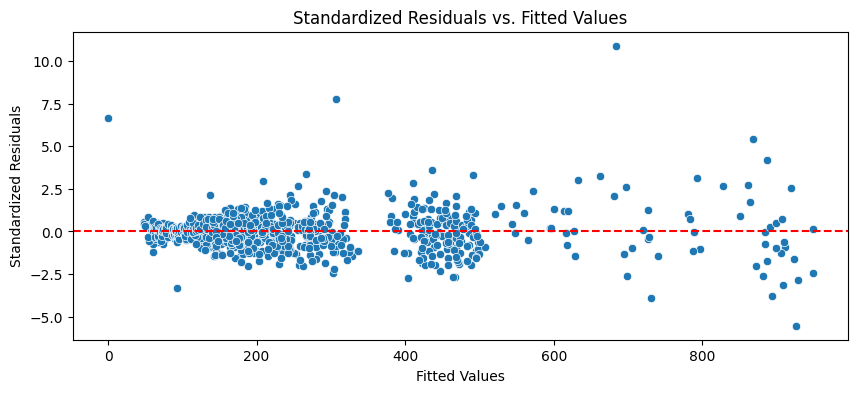

Forecasted values: [861.2319763572988, 864.3262231850924, 866.7035780774602, 867.6173368235205, 870.1966174741389]


In [62]:
order = (4, 2, 2)
seasonal_order = (0, 0, 1, 12)
model_sarimax_12 = SARIMAX(df_close, order=order, seasonal_order=seasonal_order)
model_fit_sarima_12 = model_sarimax_12.fit()

residuals = model_fit_sarima_12.resid

# Plot of residuals
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title('Plot of Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

# ACF and PACF of residuals
fig, ax = plt.subplots(1, 2, figsize=(18, 4))
plot_acf(residuals, ax=ax[0], title='Autocorrelation of Residuals')
plot_pacf(residuals, ax=ax[1], title='Partial Autocorrelation of Residuals')
plt.show()

# Standardized residuals vs. fitted values
fitted_values = model_fit_sarima_12.fittedvalues
standardized_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

plt.figure(figsize=(10, 4))
sns.scatterplot(x=fitted_values, y=standardized_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Standardized Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.show()

forecast_sarima_12 = model_fit_sarima_12.forecast(steps=5)
forecast_values_sarima_12 = forecast_sarima_12.tolist()
print("Forecasted values:", forecast_values_sarima_12)

In [79]:
forecast_result = model_fit_sarima_12.get_forecast(steps=5)

mean_forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

forecast_df_sarima_12 = pd.DataFrame({
    'Forecast': mean_forecast,
    'Lower_95%': conf_int.iloc[:, 0],
    'Upper_95%': conf_int.iloc[:, 1]
})
forecast_df_sarima_12.index = pd.date_range(start=df_nvda_clean_2020.index[-1], periods=6, freq=df_nvda_clean_2020.index.freq)[1:]  # Adjust indexing
forecast_df_sarima_12

,Forecast,Lower_95%,Upper_95%
2024-04-10 04:00:00,861.231976,843.390835,879.073118
2024-04-11 04:00:00,864.326223,839.103439,889.549008
2024-04-12 04:00:00,866.703578,836.868549,896.538607
2024-04-13 04:00:00,867.617337,833.468176,901.766498
2024-04-14 04:00:00,870.196617,832.401339,907.991896


C:\Users\gijsv\AppData\Local\Temp\ipykernel_20044\2369972443.py:38: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax3 = plt.subplot2grid((4, 1), (3, 0), rowspan=1)


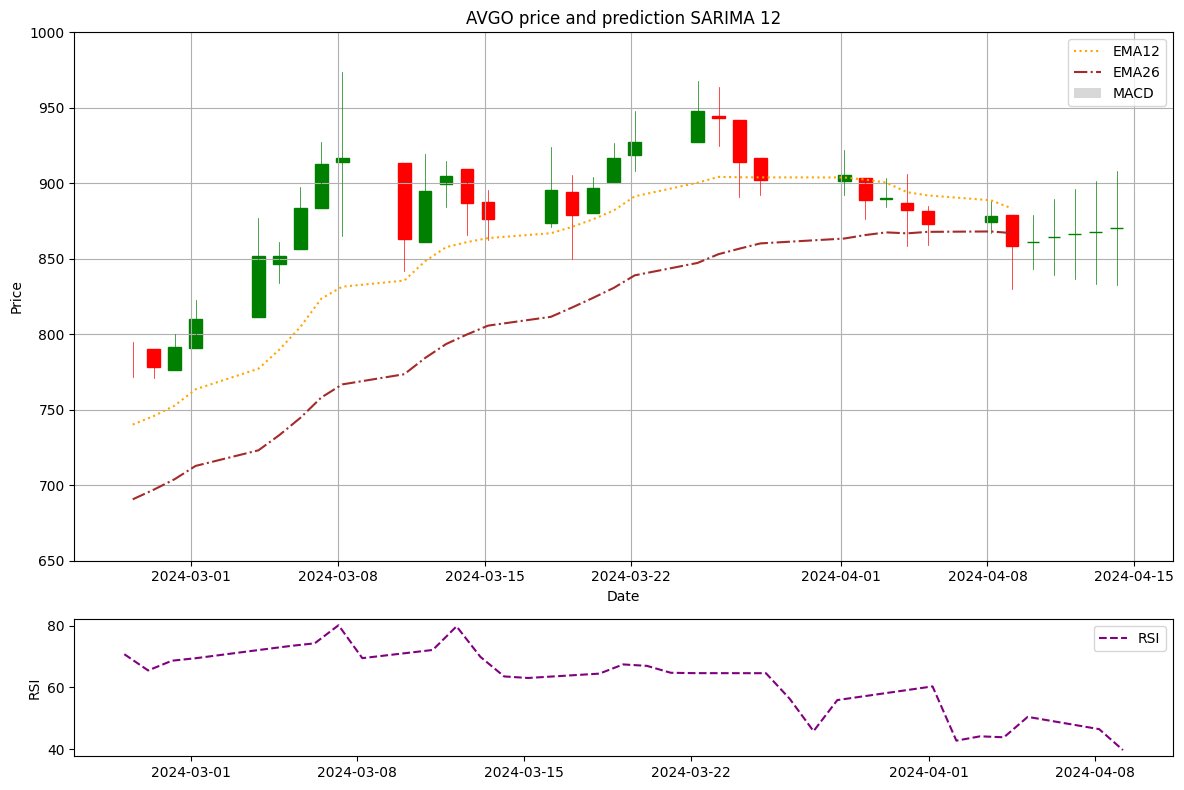

In [81]:
df_last_30 = df_nvda_clean_2020.tail(30)

forecast_df_sarima_12['Date'] = forecast_df_sarima_12.index
forecast_df_sarima_12['Date'] = forecast_df_sarima_12['Date'].apply(mdates.date2num)

forecast_candles = pd.DataFrame({
    'Date': forecast_df_sarima_12['Date'],
    'Open': forecast_df_sarima_12['Forecast'],
    'High': forecast_df_sarima_12['Upper_95%'],
    'Low': forecast_df_sarima_12['Lower_95%'],
    'Close': forecast_df_sarima_12['Forecast']
})

full_candles = pd.concat([df_ha, forecast_candles])

plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid((4, 1), (0, 0), rowspan=3)
ax1.xaxis_date()
ax1.grid(True)
ax1.set_ylim(650, 1000) 

candlestick_ohlc(ax1, full_candles.values, width=0.6, colorup='green', colordown='red', alpha=1)

plt.plot(df_last_30.index, df_last_30['ema_12'].tail(30), label='EMA12', color='orange', linestyle='dotted')
plt.plot(df_last_30.index, df_last_30['ema_26'].tail(30), label='EMA26', color='brown', linestyle='dashdot')
plt.bar(df_last_30.index, df_last_30['macd_line'].tail(30), label='MACD', color='gray', alpha=0.3)

plt.title('AVGO price and prediction SARIMA 12')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

ax2 = plt.subplot2grid((4, 1), (3, 0), rowspan=1)
ax2.bar(df_last_30.index, df_last_30['Volume'].tail(30), color='blue', alpha=0.5)
ax2.grid(True)
plt.ylabel('Volume') 

ax3 = plt.subplot2grid((4, 1), (3, 0), rowspan=1)
ax3.plot(df_last_30.index, df_last_30['rsi'].tail(30), label='RSI', color='purple', linestyle='dashed')
ax3.legend()
ax3.set_ylabel('RSI')

plt.tight_layout()
plt.show()

In [63]:
last_date = df_nvda_clean_2020.index[-1]

forecast_dates_sarima_12 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=5, freq='D')

forecast_with_dates_sarima_12 = pd.DataFrame({'Forecast': forecast_values_sarima_12}, index=forecast_dates_sarima_12)
print(forecast_with_dates_sarima_12)

                       Forecast
2024-04-10 04:00:00  861.231976
2024-04-11 04:00:00  864.326223
2024-04-12 04:00:00  866.703578
2024-04-13 04:00:00  867.617337
2024-04-14 04:00:00  870.196617


C:\Users\gijsv\AppData\Local\Temp\ipykernel_20044\2232319025.py:45: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax3 = plt.subplot2grid((4, 1), (3, 0), sharex=ax1, rowspan=1)


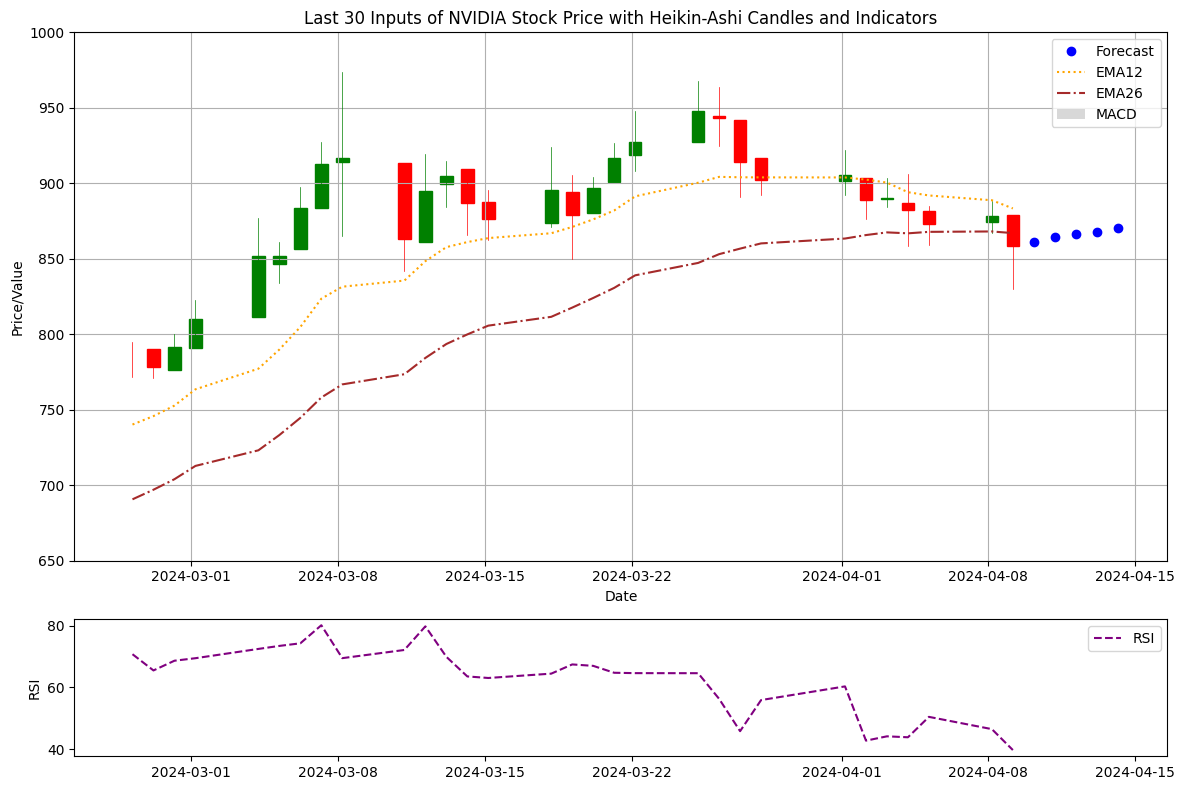

In [64]:
df_nvda_clean_2020.index = pd.to_datetime(df_nvda_clean_2020.index)

df_last_30 = df_nvda_clean_2020.tail(30)

ha_close = (df_last_30['Open'] + df_last_30['High'] + df_last_30['Low'] + df_last_30['Close']) / 4
ha_open = (df_last_30['Open'].shift(1) + df_last_30['Close'].shift(1)) / 2
ha_high = df_last_30[['High', 'Open', 'Close']].max(axis=1)
ha_low = df_last_30[['Low', 'Open', 'Close']].min(axis=1)


df_ha = pd.DataFrame({'Date': df_last_30.index,
                      'Open': ha_open,
                      'High': ha_high,
                      'Low': ha_low,
                      'Close': ha_close})

plt.figure(figsize=(12, 8))

ax1 = plt.subplot2grid((4, 1), (0, 0), rowspan=3)
ax1.xaxis_date()
ax1.grid(True)
ax1.set_ylim(650, 1000)

df_ha['Date'] = df_ha['Date'].apply(mdates.date2num)

candlestick_ohlc(ax1, df_ha.values, width=0.6, colorup='green', colordown='red', alpha=1)

plt.plot(forecast_dates_sarima_12, forecast_with_dates_sarima_12['Forecast'], marker='o', color='blue', linestyle='None', label='Forecast')

# plt.plot(df_last_30.index, df_last_30['rsi'].tail(30), label='RSI', color='purple', linestyle='dashed')
plt.plot(df_last_30.index, df_last_30['ema_12'].tail(30), label='EMA12', color='orange', linestyle='dotted')
plt.plot(df_last_30.index, df_last_30['ema_26'].tail(30), label='EMA26', color='brown', linestyle='dashdot')
plt.bar(df_last_30.index, df_last_30['macd_line'].tail(30), label='MACD', color='gray', alpha=0.3)

plt.title('Last 30 Inputs of NVIDIA Stock Price with Heikin-Ashi Candles and Indicators')
plt.xlabel('Date')
plt.ylabel('Price/Value')
plt.legend()

ax2 = plt.subplot2grid((4, 1), (3, 0), sharex=ax3, rowspan=1)
ax2.bar(df_last_30.index, df_last_30['Volume'].tail(30), color='blue', alpha=0.5)
ax2.grid(True)
plt.ylabel('Volume') 

ax3 = plt.subplot2grid((4, 1), (3, 0), sharex=ax1, rowspan=1)

ax3.plot(df_last_30.index, df_last_30['rsi'].tail(30), label='RSI', color='purple', linestyle='dashed')

ax3.legend()
ax3.set_ylabel('RSI')
plt.tight_layout()

plt.show()

# Sarima 4

In [33]:
s = 4
model_sarima_4 = auto_arima(df_close, seasonal=True, m=s, max_order=None)

In [34]:
model_sarima_4

ARIMA(order=(2, 2, 1), scoring_args={}, seasonal_order=(0, 0, 0, 4),
      suppress_warnings=True, with_intercept=False)

In [65]:
order = (2, 2, 1)
seasonal_order = (0, 0, 0, 4)
model_sarimax_4 = SARIMAX(df_close, order=order, seasonal_order=seasonal_order)
model_fit_sarima_4 = model_sarimax_4.fit()

forecast_sarima_4 = model_fit_sarima_4.forecast(steps=5)
forecast_values_sarima_4 = forecast_sarima_4.tolist()
print("Forecasted values:", forecast_sarima_4)

Forecasted values: 1061    858.157525
1062    863.397960
1063    866.113317
1064    868.802894
1065    871.776243
Name: predicted_mean, dtype: float64


In [66]:
last_date = df_nvda_clean_2020.index[-1]

forecast_dates_sarima4 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=5, freq='D')

forecast_with_dates_sarima4 = pd.DataFrame({'Forecast': forecast_values_sarima_4}, index=forecast_dates_sarima4)
print(forecast_with_dates_sarima4)

                       Forecast
2024-04-10 04:00:00  858.157525
2024-04-11 04:00:00  863.397960
2024-04-12 04:00:00  866.113317
2024-04-13 04:00:00  868.802894
2024-04-14 04:00:00  871.776243


C:\Users\gijsv\AppData\Local\Temp\ipykernel_20044\2344890975.py:45: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax3 = plt.subplot2grid((4, 1), (3, 0), sharex=ax1, rowspan=1)


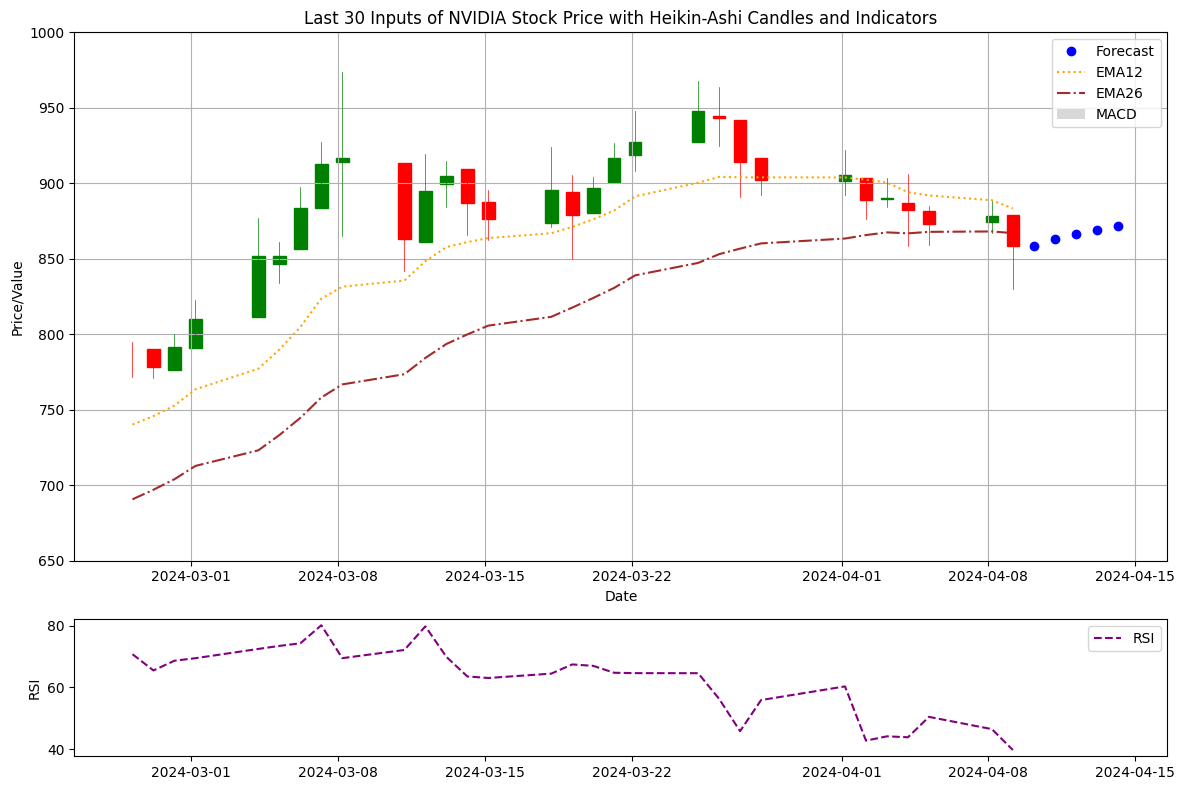

In [67]:
df_nvda_clean_2020.index = pd.to_datetime(df_nvda_clean_2020.index)

df_last_30 = df_nvda_clean_2020.tail(30)

ha_close = (df_last_30['Open'] + df_last_30['High'] + df_last_30['Low'] + df_last_30['Close']) / 4
ha_open = (df_last_30['Open'].shift(1) + df_last_30['Close'].shift(1)) / 2
ha_high = df_last_30[['High', 'Open', 'Close']].max(axis=1)
ha_low = df_last_30[['Low', 'Open', 'Close']].min(axis=1)


df_ha = pd.DataFrame({'Date': df_last_30.index,
                      'Open': ha_open,
                      'High': ha_high,
                      'Low': ha_low,
                      'Close': ha_close})

plt.figure(figsize=(12, 8))

ax1 = plt.subplot2grid((4, 1), (0, 0), rowspan=3)
ax1.xaxis_date()
ax1.grid(True)
ax1.set_ylim(650, 1000)

df_ha['Date'] = df_ha['Date'].apply(mdates.date2num)

candlestick_ohlc(ax1, df_ha.values, width=0.6, colorup='green', colordown='red', alpha=1)

plt.plot(forecast_dates_sarima4, forecast_with_dates_sarima4['Forecast'], marker='o', color='blue', linestyle='None', label='Forecast')

# plt.plot(df_last_30.index, df_last_30['rsi'].tail(30), label='RSI', color='purple', linestyle='dashed')
plt.plot(df_last_30.index, df_last_30['ema_12'].tail(30), label='EMA12', color='orange', linestyle='dotted')
plt.plot(df_last_30.index, df_last_30['ema_26'].tail(30), label='EMA26', color='brown', linestyle='dashdot')
plt.bar(df_last_30.index, df_last_30['macd_line'].tail(30), label='MACD', color='gray', alpha=0.3)

plt.title('Last 30 Inputs of NVIDIA Stock Price with Heikin-Ashi Candles and Indicators')
plt.xlabel('Date')
plt.ylabel('Price/Value')
plt.legend()

ax2 = plt.subplot2grid((4, 1), (3, 0), sharex=ax1, rowspan=1)
ax2.bar(df_last_30.index, df_last_30['Volume'].tail(30), color='blue', alpha=0.5)
ax2.grid(True)
plt.ylabel('Volume') 

ax3 = plt.subplot2grid((4, 1), (3, 0), sharex=ax1, rowspan=1)

ax3.plot(df_last_30.index, df_last_30['rsi'].tail(30), label='RSI', color='purple', linestyle='dashed')

ax3.legend()
ax3.set_ylabel('RSI')
plt.tight_layout()

plt.show()

# Walk forward validation ARIMA

In [68]:
df_close.index = pd.to_datetime(df_close.index)
model = auto_arima(df_close, seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.49 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=8443.606, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=8202.801, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=8441.608, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=8024.919, Time=0.14 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=7954.179, Time=0.28 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=7873.891, Time=0.31 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=7843.417, Time=0.45 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.16 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=7706.816, Time=0.90 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(4,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.60 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.29 sec
 ARIMA(5,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.13 sec
 A

In [69]:
df_nvda_clean.index = pd.to_datetime(df_nvda_clean.index)
start_date = pd.Timestamp('2020-01-22 05:00:00')
df_nvda_clean_2020 = df_nvda_clean[df_nvda_clean.index >= start_date]

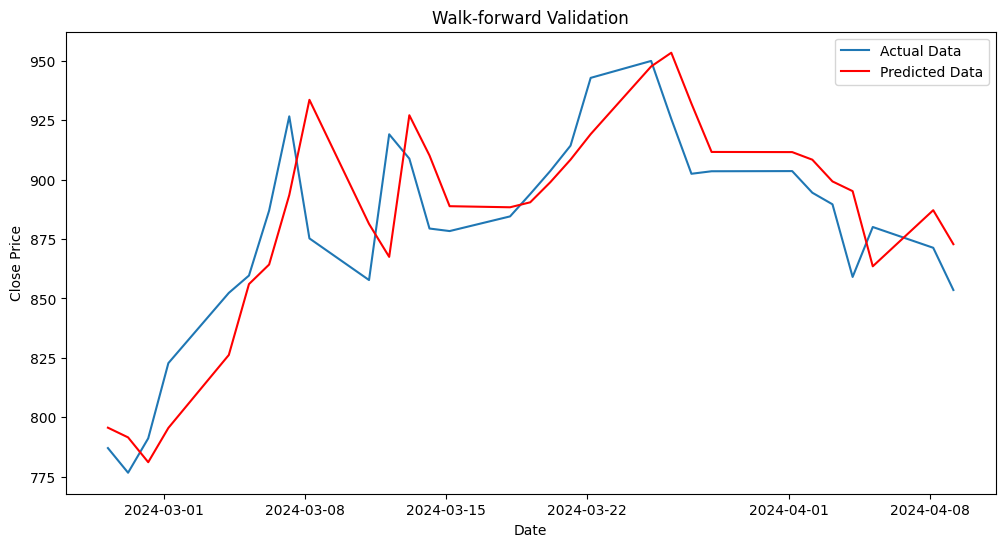

MSE:  546.5508649429726


In [70]:
df_nvda_clean_2020.index = pd.to_datetime(df_nvda_clean_2020.index)

df_nvda_clean_2020 = df_nvda_clean_2020.sort_index()

n_test = 30

history = df_nvda_clean_2020['Close'].iloc[:-n_test]
predictions = []
actual = list(df_nvda_clean_2020['Close'].iloc[-n_test:])


for t in range(n_test):
    model = ARIMA(history, order=(2,2,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output.iloc[0]
    predictions.append(yhat)
    obs = actual[t]
    history = pd.concat([history, pd.Series([obs], index=[df_nvda_clean_2020.index[len(history)]])])


plt.figure(figsize=(12, 6))
plt.plot(df_nvda_clean_2020.index[-n_test:], actual, label='Actual Data')
plt.plot(df_nvda_clean_2020.index[-n_test:], predictions, color='red', label='Predicted Data')
plt.legend()
plt.title("Walk-forward Validation")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(actual, predictions)
print('MSE: ', mse)

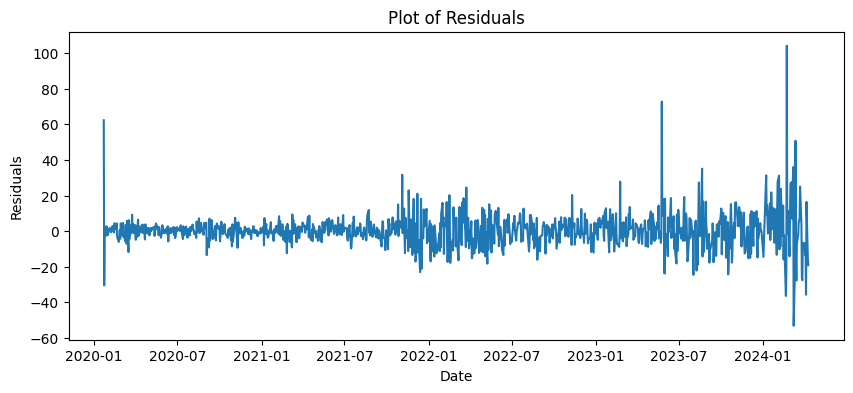

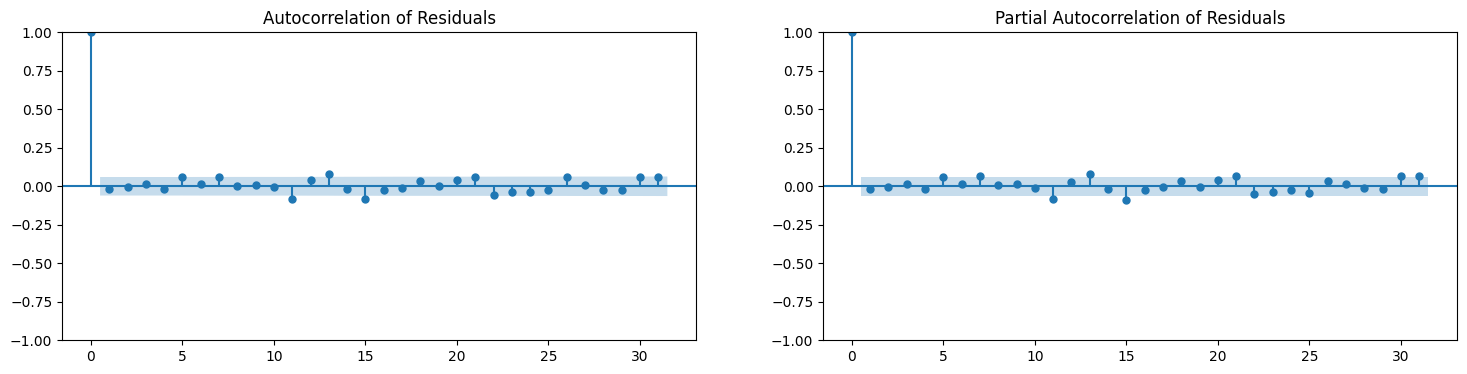

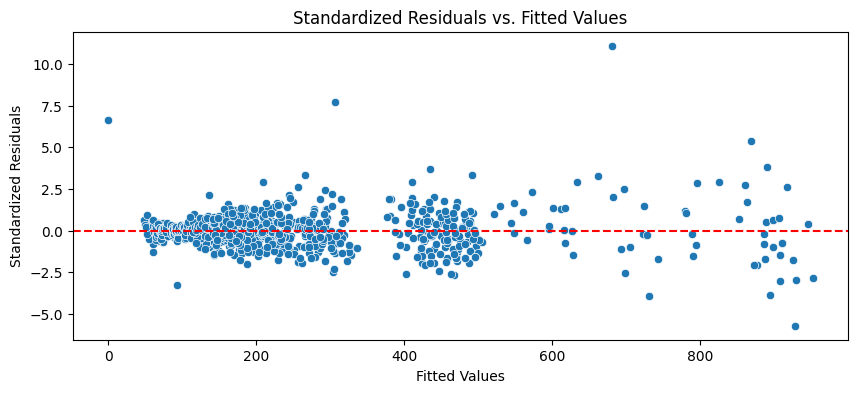

In [71]:
model = ARIMA(df_nvda_clean_2020['Close'], order=(2, 2, 1))
model_fit = model.fit()

residuals = model_fit.resid

# Plot of residuals
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title('Plot of Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

# ACF and PACF of residuals
fig, ax = plt.subplots(1, 2, figsize=(18, 4))
plot_acf(residuals, ax=ax[0], title='Autocorrelation of Residuals')
plot_pacf(residuals, ax=ax[1], title='Partial Autocorrelation of Residuals')
plt.show()

# Standardized residuals vs. fitted values
fitted_values = model_fit.fittedvalues
standardized_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

plt.figure(figsize=(10, 4))
sns.scatterplot(x=fitted_values, y=standardized_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Standardized Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.show()

## Fitted arima model and heikin ashi candles

In [72]:
model = ARIMA(df_nvda_clean_2020['Close'], order=(2, 2, 1))
model_fit = model.fit()

forecast_arima = model_fit.forecast(steps=5)
forecast_values_arima = forecast_arima.tolist()
print("Forecasted values for the next 5 points:")
print(forecast_values_arima)

Forecasted values for the next 5 points:
[858.1575245352795, 863.3979602011649, 866.1133174303999, 868.8028943312694, 871.7762428524279]


In [76]:
forecast_result = model_fit.get_forecast(steps=5)

mean_forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

forecast_df_arima = pd.DataFrame({
    'Forecast': mean_forecast,
    'Lower_95%': conf_int.iloc[:, 0],
    'Upper_95%': conf_int.iloc[:, 1]
})
forecast_df_arima.index = pd.date_range(start=df_nvda_clean_2020.index[-1], periods=6, freq=df_nvda_clean_2020.index.freq)[1:]  # Adjust indexing
forecast_df_arima

,Forecast,Lower_95%,Upper_95%
2024-04-10 04:00:00,858.157525,840.252913,876.062136
2024-04-11 04:00:00,863.397960,838.139496,888.656424
2024-04-12 04:00:00,866.113317,836.195961,896.030674
2024-04-13 04:00:00,868.802894,834.734046,902.871742
2024-04-14 04:00:00,871.776243,833.826504,909.725982


C:\Users\gijsv\AppData\Local\Temp\ipykernel_20044\2177328855.py:37: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax3 = plt.subplot2grid((4, 1), (3, 0), rowspan=1)


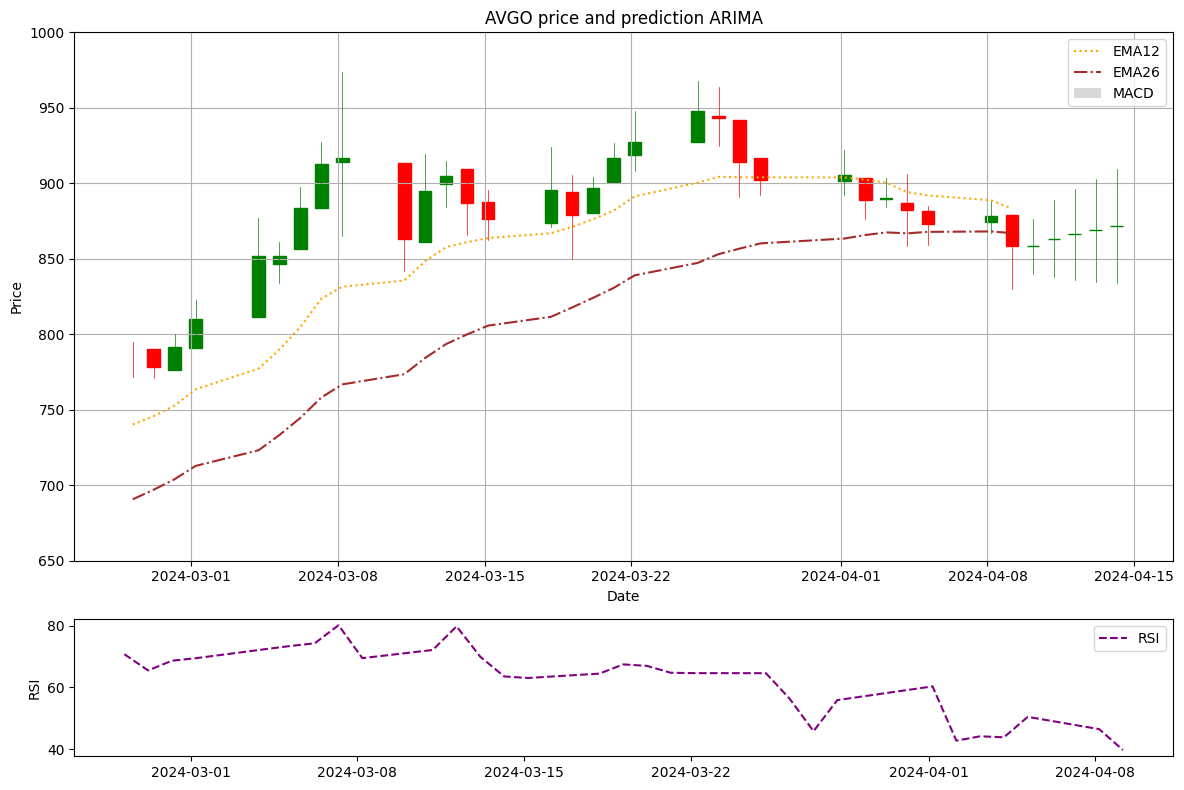

In [78]:
df_last_30 = df_nvda_clean_2020.tail(30)
forecast_df_arima['Date'] = forecast_df_arima.index
forecast_df_arima['Date'] = forecast_df_arima['Date'].apply(mdates.date2num)

forecast_candles = pd.DataFrame({
    'Date': forecast_df_arima['Date'],
    'Open': forecast_df_arima['Forecast'],
    'High': forecast_df_arima['Upper_95%'],
    'Low': forecast_df_arima['Lower_95%'],
    'Close': forecast_df_arima['Forecast']
})

full_candles = pd.concat([df_ha, forecast_candles])

plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid((4, 1), (0, 0), rowspan=3)
ax1.xaxis_date()
ax1.grid(True)
ax1.set_ylim(650, 1000) 

candlestick_ohlc(ax1, full_candles.values, width=0.6, colorup='green', colordown='red', alpha=1)

plt.plot(df_last_30.index, df_last_30['ema_12'].tail(30), label='EMA12', color='orange', linestyle='dotted')
plt.plot(df_last_30.index, df_last_30['ema_26'].tail(30), label='EMA26', color='brown', linestyle='dashdot')
plt.bar(df_last_30.index, df_last_30['macd_line'].tail(30), label='MACD', color='gray', alpha=0.3)

plt.title('AVGO price and prediction ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

ax2 = plt.subplot2grid((4, 1), (3, 0), rowspan=1)
ax2.bar(df_last_30.index, df_last_30['Volume'].tail(30), color='blue', alpha=0.5)
ax2.grid(True)
plt.ylabel('Volume') 

ax3 = plt.subplot2grid((4, 1), (3, 0), rowspan=1)
ax3.plot(df_last_30.index, df_last_30['rsi'].tail(30), label='RSI', color='purple', linestyle='dashed')
ax3.legend()
ax3.set_ylabel('RSI')

plt.tight_layout()
plt.show()

In [73]:
last_date = df_nvda_clean_2020.index[-1]

forecast_dates_arima = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=5, freq='D')

forecast_with_dates_arima = pd.DataFrame({'Forecast': forecast_values_arima}, index=forecast_dates_arima)
print(forecast_with_dates_arima)

                       Forecast
2024-04-10 04:00:00  858.157525
2024-04-11 04:00:00  863.397960
2024-04-12 04:00:00  866.113317
2024-04-13 04:00:00  868.802894
2024-04-14 04:00:00  871.776243


C:\Users\gijsv\AppData\Local\Temp\ipykernel_20044\1753353210.py:47: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax3 = plt.subplot2grid((4, 1), (3, 0), sharex=ax1, rowspan=1)


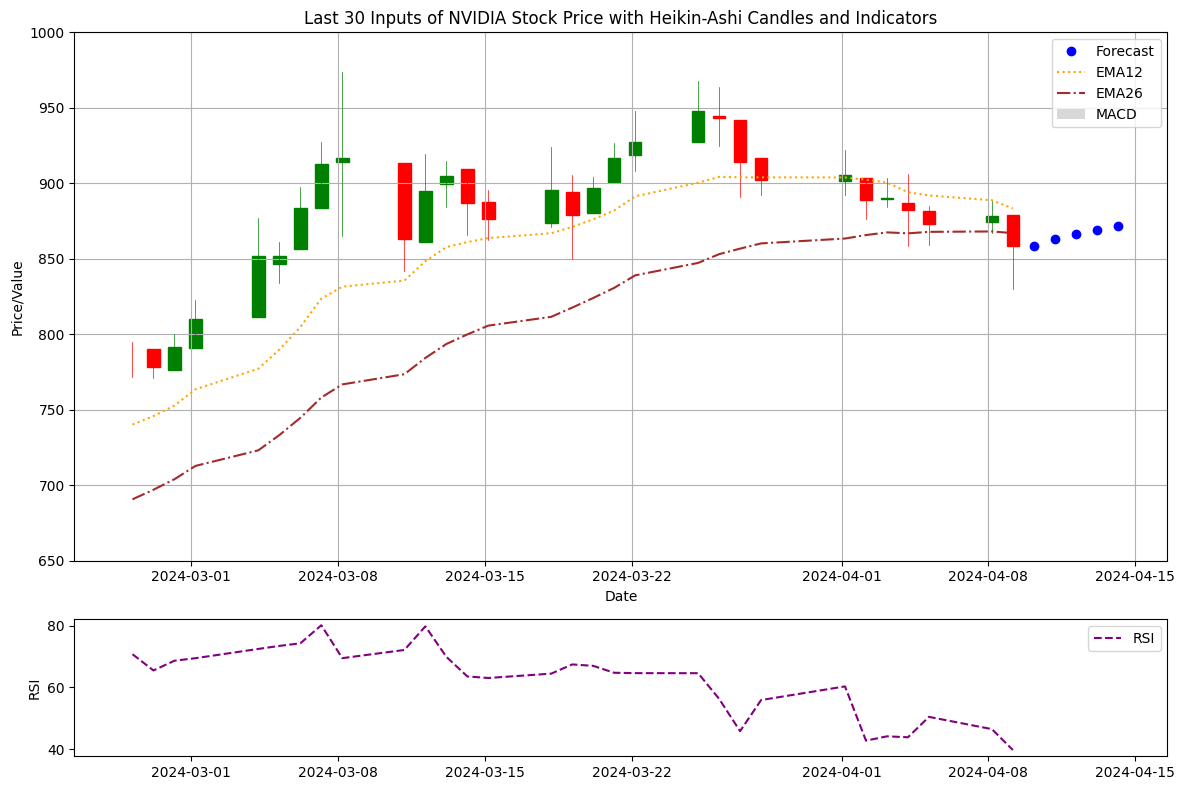

In [75]:
df_nvda_clean_2020.index = pd.to_datetime(df_nvda_clean_2020.index)

df_last_30 = df_nvda_clean_2020.tail(30)

ha_close = (df_last_30['Open'] + df_last_30['High'] + df_last_30['Low'] + df_last_30['Close']) / 4
ha_open = (df_last_30['Open'].shift(1) + df_last_30['Close'].shift(1)) / 2
ha_high = df_last_30[['High', 'Open', 'Close']].max(axis=1)
ha_low = df_last_30[['Low', 'Open', 'Close']].min(axis=1)


df_ha = pd.DataFrame({'Date': df_last_30.index,
                      'Open': ha_open,
                      'High': ha_high,
                      'Low': ha_low,
                      'Close': ha_close})


plt.figure(figsize=(12, 8))


ax1 = plt.subplot2grid((4, 1), (0, 0), rowspan=3)
ax1.xaxis_date()
ax1.grid(True)
ax1.set_ylim(650, 1000)

df_ha['Date'] = df_ha['Date'].apply(mdates.date2num)

candlestick_ohlc(ax1, df_ha.values, width=0.6, colorup='green', colordown='red', alpha=1)

plt.plot(forecast_dates_arima, forecast_with_dates_arima['Forecast'], marker='o', color='blue', linestyle='None', label='Forecast')

# plt.plot(df_last_30.index, df_last_30['rsi'].tail(30), label='RSI', color='purple', linestyle='dashed')
plt.plot(df_last_30.index, df_last_30['ema_12'].tail(30), label='EMA12', color='orange', linestyle='dotted')
plt.plot(df_last_30.index, df_last_30['ema_26'].tail(30), label='EMA26', color='brown', linestyle='dashdot')
plt.bar(df_last_30.index, df_last_30['macd_line'].tail(30), label='MACD', color='gray', alpha=0.3)

plt.title('Last 30 Inputs of NVIDIA Stock Price with Heikin-Ashi Candles and Indicators')
plt.xlabel('Date')
plt.ylabel('Price/Value')
plt.legend()

ax2 = plt.subplot2grid((4, 1), (3, 0), sharex=ax3, rowspan=1)
ax2.bar(df_last_30.index, df_last_30['Volume'].tail(30), color='blue', alpha=0.5)
ax2.grid(True)
plt.ylabel('Volume') 

ax3 = plt.subplot2grid((4, 1), (3, 0), sharex=ax1, rowspan=1)

ax3.plot(df_last_30.index, df_last_30['rsi'].tail(30), label='RSI', color='purple', linestyle='dashed')

ax3.legend()
ax3.set_ylabel('RSI')
plt.tight_layout()

plt.show()